In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import zipfile
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from collections import defaultdict

# Configuration
dataset_zip_path = 'dataset.zip'
data_dir = "dataset"
num_classes = 45
batch_size = 32
num_epochs = 10
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

**TRAINING**

Dataset contents: ['train', 'val']
Starting training...


Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████| 985/985 [02:43<00:00,  6.01it/s]


Epoch [1/10]
Training Loss: 0.5941, Accuracy: 82.37%
Validation Loss: 0.1136, Accuracy: 97.38%
✅ Best model saved with accuracy: 97.38%


Epoch 2/10: 100%|████████████████████████████████████████████████████████████████████| 985/985 [02:46<00:00,  5.92it/s]


Epoch [2/10]
Training Loss: 0.2434, Accuracy: 93.03%
Validation Loss: 0.0981, Accuracy: 97.41%
✅ Best model saved with accuracy: 97.41%


Epoch 3/10: 100%|████████████████████████████████████████████████████████████████████| 985/985 [02:44<00:00,  5.99it/s]


Epoch [3/10]
Training Loss: 0.1916, Accuracy: 94.81%
Validation Loss: 0.0638, Accuracy: 98.70%
✅ Best model saved with accuracy: 98.70%


Epoch 4/10: 100%|████████████████████████████████████████████████████████████████████| 985/985 [02:46<00:00,  5.93it/s]


Epoch [4/10]
Training Loss: 0.1674, Accuracy: 95.63%
Validation Loss: 0.0836, Accuracy: 97.91%


Epoch 5/10: 100%|████████████████████████████████████████████████████████████████████| 985/985 [02:51<00:00,  5.73it/s]


Epoch [5/10]
Training Loss: 0.1354, Accuracy: 96.31%
Validation Loss: 0.0698, Accuracy: 98.41%


Epoch 6/10: 100%|████████████████████████████████████████████████████████████████████| 985/985 [02:48<00:00,  5.84it/s]


Epoch [6/10]
Training Loss: 0.1466, Accuracy: 96.11%
Validation Loss: 0.0814, Accuracy: 98.13%


Epoch 7/10: 100%|████████████████████████████████████████████████████████████████████| 985/985 [02:45<00:00,  5.94it/s]


Epoch [7/10]
Training Loss: 0.1262, Accuracy: 96.65%
Validation Loss: 0.0651, Accuracy: 98.56%


Epoch 8/10: 100%|████████████████████████████████████████████████████████████████████| 985/985 [02:48<00:00,  5.85it/s]


Epoch [8/10]
Training Loss: 0.1108, Accuracy: 97.09%
Validation Loss: 0.0536, Accuracy: 98.89%
✅ Best model saved with accuracy: 98.89%


Epoch 9/10: 100%|████████████████████████████████████████████████████████████████████| 985/985 [02:49<00:00,  5.81it/s]


Epoch [9/10]
Training Loss: 0.1068, Accuracy: 97.34%
Validation Loss: 0.0575, Accuracy: 98.79%


Epoch 10/10: 100%|███████████████████████████████████████████████████████████████████| 985/985 [02:49<00:00,  5.81it/s]


Epoch [10/10]
Training Loss: 0.1064, Accuracy: 97.26%
Validation Loss: 0.0529, Accuracy: 98.83%


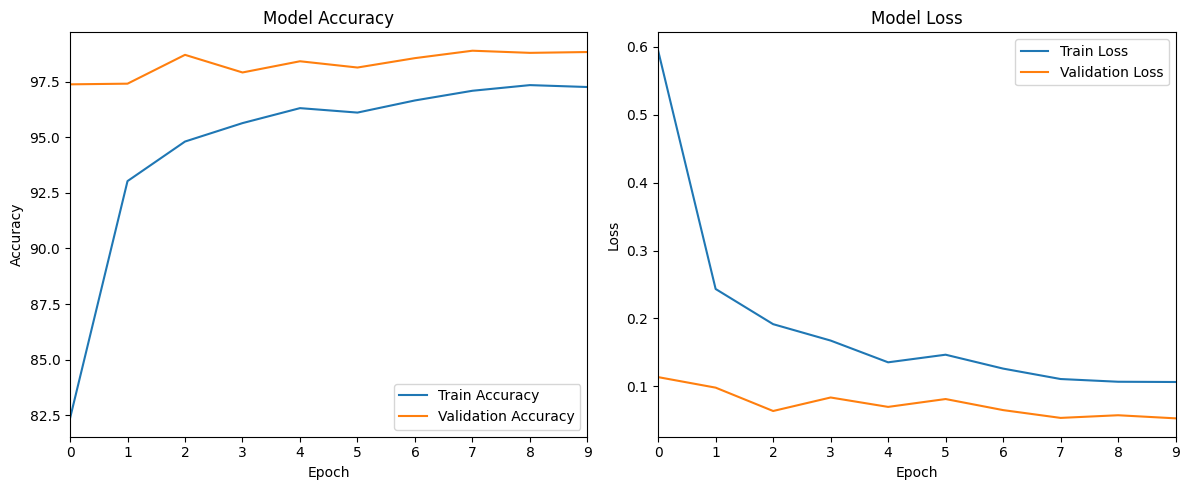


Evaluating per-character accuracy...


Evaluating per-character accuracy:  98%|████████████████████████████████████████████▎| 415/422 [00:24<00:00, 17.23it/s]

Class 0 Accuracy: 96.00%
Class 1 Accuracy: 99.00%
Class 2 Accuracy: 99.00%
Class 3 Accuracy: 99.00%
Class 4 Accuracy: 99.00%
Class 5 Accuracy: 100.00%
Class 6 Accuracy: 99.00%
Class 7 Accuracy: 98.00%
Class 8 Accuracy: 100.00%
Class 9 Accuracy: 99.00%
Class 10 Accuracy: 100.00%
Class 11 Accuracy: 97.00%
Class 12 Accuracy: 98.00%
Class 13 Accuracy: 100.00%
Class 14 Accuracy: 100.00%
Class 15 Accuracy: 93.00%
Class 16 Accuracy: 100.00%
Class 17 Accuracy: 95.00%
Class 18 Accuracy: 100.00%
Class 19 Accuracy: 100.00%
Class 20 Accuracy: 98.00%
Class 21 Accuracy: 95.00%
Class 22 Accuracy: 100.00%
Class 23 Accuracy: 100.00%
Class 24 Accuracy: 100.00%
Class 25 Accuracy: 97.00%
Class 26 Accuracy: 100.00%
Class 27 Accuracy: 96.00%
Class 28 Accuracy: 100.00%
Class 29 Accuracy: 100.00%
Class 30 Accuracy: 98.00%
Class 31 Accuracy: 100.00%
Class 32 Accuracy: 100.00%
Class 33 Accuracy: 98.00%
Class 34 Accuracy: 99.00%
Class 35 Accuracy: 100.00%
Class 36 Accuracy: 98.00%
Class 37 Accuracy: 100.00%
Clas

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import zipfile
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from collections import defaultdict

# Configuration
dataset_zip_path = 'dataset.zip'
data_dir = "dataset"
num_classes = 45
batch_size = 32
num_epochs = 10
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Extract dataset if needed
def setup_dataset():
    if not os.path.exists(data_dir):
        print("Extracting dataset...")
        with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)

    # Verify dataset structure
    contents = os.listdir(data_dir)
    print(f"Dataset contents: {contents}")

    # Verify train and val directories exist
    if 'train' not in contents or 'val' not in contents:
        raise Exception("Dataset must contain 'train' and 'val' directories")

# Data transforms
transform = {
    'train': transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((56, 56)),
        transforms.RandomAffine(degrees=10, translate=(0.15, 0.15), shear=10, scale=(0.85, 1.15), fill=255),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
    'val': transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((56, 56)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
}

def load_datasets():
    """
    Load training and validation datasets and create DataLoader objects.
    Returns:
        tuple: (train_loader, val_loader)
    """
    # Load datasets using ImageFolder
    train_dataset = datasets.ImageFolder(
        os.path.join(data_dir, 'train'),
        transform=transform['train']
    )

    val_dataset = datasets.ImageFolder(
        os.path.join(data_dir, 'val'),
        transform=transform['val']
    )

    # Create data loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True
    )

    return train_loader, val_loader

class TrainingHistory:
    def __init__(self):
        self.train_loss = []
        self.train_acc = []
        self.val_loss = []
        self.val_acc = []

    def plot(self):
        plt.figure(figsize=(12, 5))

        # Plot Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(self.train_acc, label='Train Accuracy')
        plt.plot(self.val_acc, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title('Model Accuracy')
        plt.xlim(0, 9)
        plt.xticks(range(10))

        # Plot Loss
        plt.subplot(1, 2, 2)
        plt.plot(self.train_loss, label='Train Loss')
        plt.plot(self.val_loss, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Model Loss')
        plt.xlim(0, 9)
        plt.xticks(range(10))

        plt.tight_layout()
        plt.show()
        plt.savefig('training_history.png')
        plt.close()

def evaluate_per_character_accuracy(model, val_loader, device, num_samples_per_class=100):
    """
    Evaluate model accuracy per character class.

    Args:
        model: The trained model
        val_loader: Validation data loader
        device: Device to run evaluation on
        num_samples_per_class: Number of samples to evaluate per class

    Returns:
        dict: Dictionary containing accuracy for each character class
    """
    model.eval()
    class_correct = defaultdict(int)
    class_total = defaultdict(int)

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Evaluating per-character accuracy"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Update counts for each class
            for label, pred in zip(labels, predicted):
                if class_total[label.item()] < num_samples_per_class:
                    class_total[label.item()] += 1
                    if label == pred:
                        class_correct[label.item()] += 1

            # Check if we have enough samples for all classes
            if all(class_total[i] >= num_samples_per_class for i in range(num_classes)):
                break

    # Calculate accuracy per class
    accuracies = {}
    for class_idx in range(num_classes):
        if class_total[class_idx] > 0:
            accuracy = 100 * class_correct[class_idx] / class_total[class_idx]
            accuracies[class_idx] = accuracy
            print(f"Class {class_idx} Accuracy: {accuracy:.2f}%")

    return accuracies

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    history = TrainingHistory()
    best_acc = 0.0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total

        history.train_loss.append(epoch_loss)
        history.train_acc.append(epoch_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_running_loss / len(val_loader)
        val_acc = 100 * val_correct / val_total

        history.val_loss.append(val_loss)
        history.val_acc.append(val_acc)

        print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.2f}%")

        # Save best model with just the state dict
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'resnet18_model.pth')
            print(f"✅ Best model saved with accuracy: {best_acc:.2f}%")

    history.plot()
    return history

def main():
    setup_dataset()
    train_loader, val_loader = load_datasets()

    model = models.resnet18(pretrained=True)
    # Modify the first conv layer to accept grayscale input
    model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    # Modify the final layer to match our number of classes
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    print("Starting training...")
    history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)

    # Evaluate per-character accuracy
    print("\nEvaluating per-character accuracy...")
    character_accuracies = evaluate_per_character_accuracy(
        model, val_loader, device, num_samples_per_class=100
    )

if __name__ == "__main__":
    main()

TEST

Starting model testing...

Processing ge_gi (93).jpg...


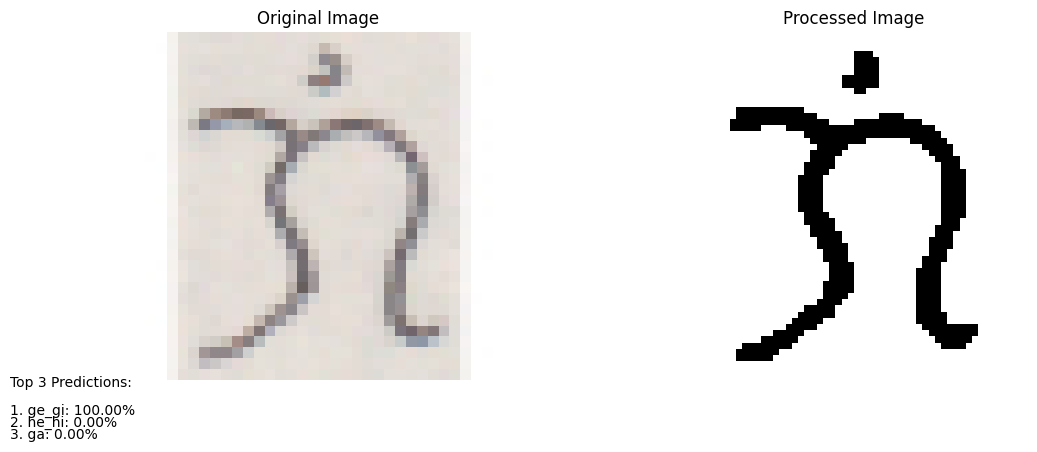


Top 3 predictions:
1. ge_gi: 100.00%
2. he_hi: 0.00%
3. ga: 0.00%

Processing Screenshot 2025-02-10 064828.png...


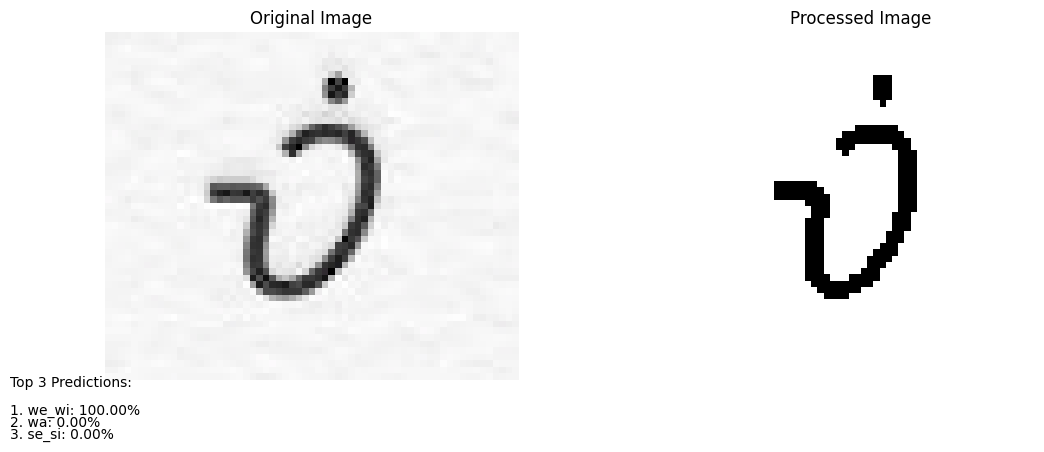


Top 3 predictions:
1. we_wi: 100.00%
2. wa: 0.00%
3. se_si: 0.00%

Processing test_image.jpg...


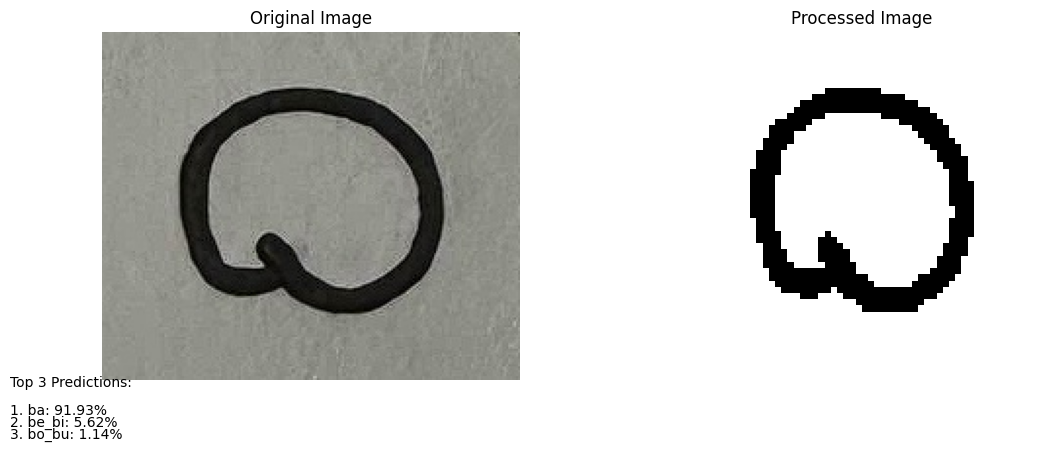


Top 3 predictions:
1. ba: 91.93%
2. be_bi: 5.62%
3. bo_bu: 1.14%

Processing Untitled.png...


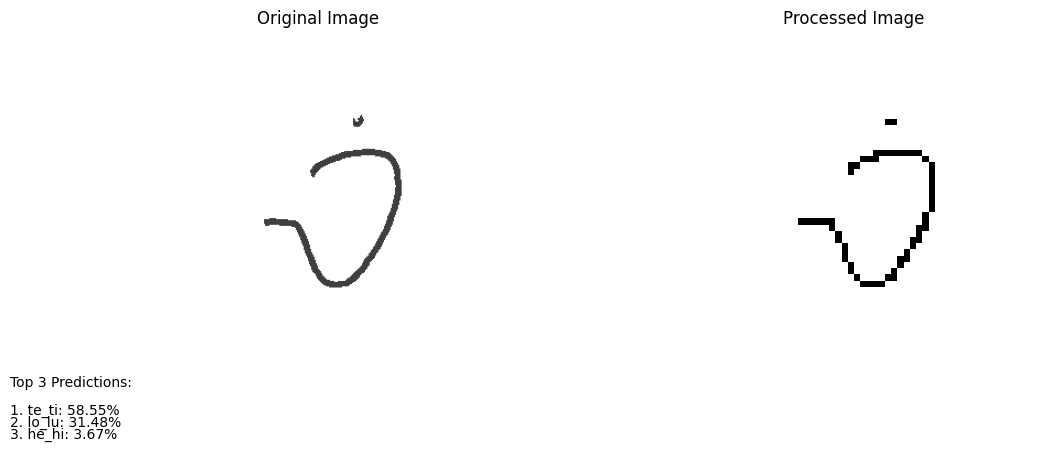


Top 3 predictions:
1. te_ti: 58.55%
2. lo_lu: 31.48%
3. he_hi: 3.67%


In [39]:
def load_trained_model(model_path, num_classes=45, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")):
    """Load the trained model from checkpoint"""
    model = models.resnet18(pretrained=True)
    # Modify for grayscale input
    model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    # Modify final layer
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model = model.to(device)

    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    return model

def preprocess_image(image, target_size=56):
    """Preprocess a single image for prediction"""
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Resize with proper interpolation
    resized = cv2.resize(gray, (target_size, target_size),
                       interpolation=cv2.INTER_LINEAR)

    # Apply global threshold
    _, binary = cv2.threshold(resized, 0, 255,
                            cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Normalize to [0, 1]
    normalized = binary.astype(float) / 255.0

    return normalized

def get_class_names(data_dir):
    """Get class names from training directory"""
    train_dir = os.path.join(data_dir, 'train')
    return sorted(os.listdir(train_dir))

def predict_image(model, image_path, class_names, device):
    """Make predictions for a single image"""
    # Load and convert image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Failed to load image")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Store original for visualization
    original_image = image.copy()

    # Process image
    processed = preprocess_image(image)

    # Create and normalize tensor
    processed_tensor = torch.FloatTensor(processed).unsqueeze(0).unsqueeze(0)
    normalized_tensor = transforms.Normalize(mean=[0.5], std=[0.5])(processed_tensor)
    normalized_tensor = normalized_tensor.to(device)

    # Make prediction
    with torch.no_grad():
        outputs = model(normalized_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)[0]

    # Get top 3 predictions
    top3_prob, top3_indices = torch.topk(probabilities, 3)
    predictions = [(class_names[idx], prob.item()) for idx, prob in zip(top3_indices, top3_prob)]

    return original_image, processed, predictions

def visualize_results(original_image, processed_image, predictions):
    """Visualize prediction results"""
    plt.figure(figsize=(12, 4))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    # Plot processed image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')

    # Add predictions as text
    plt.figtext(0.02, 0.02, 'Top 3 Predictions:', fontsize=10)
    for i, (class_name, prob) in enumerate(predictions):
        plt.figtext(0.02, -0.05 - (i * 0.03),
                   f"{i+1}. {class_name}: {prob*100:.2f}%",
                   fontsize=10)

    plt.tight_layout()
    plt.show()

def main():
    """Test the trained model on new images"""
    print("Starting model testing...")

    model_path = 'resnet18_model.pth'
    test_dir = 'test'

    # Load model and class names
    model = load_trained_model(model_path)
    class_names = get_class_names(data_dir)

    # Process all images in test directory
    test_images = [f for f in os.listdir(test_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for image_name in test_images:
        image_path = os.path.join(test_dir, image_name)
        print(f"\nProcessing {image_name}...")

        # Make prediction and visualize results
        original_image, processed_image, predictions = predict_image(
            model, image_path, class_names, device
        )

        visualize_results(original_image, processed_image, predictions)

        # Print predictions
        print("\nTop 3 predictions:")
        for i, (class_name, probability) in enumerate(predictions):
            print(f"{i+1}. {class_name}: {probability*100:.2f}%")

if __name__ == "__main__":
    main()